# optimization

- learning goal: find optimal parameters $\beta$ minimize **a cost/loss function** $f(\beta)$

$$
\hat \beta = \arg\min_{\beta}f(\beta)
$$

- cost is a proxy for **accuracy** - we really care abount

- pure optimization: find optimal parameters that minimize or maximize an **objective/criterion** function

## Metrics

- optimization error (estimated squared error): where $\hat \beta$ is the convergence value

$$
\left \| \beta_k-\hat \beta \right \|^{2}
$$


- statistical error (true squared error): where $\beta^{*}$ is the true value of optimal $\beta$

$$
\left \| \beta_k-\beta^{*} \right \|^{2}
$$


- in practice, bc true $\beta$ is unknown, we focus on optimization error

## closed form solution

- optimization has no closed form solution for general loss function, but has closed form solution for GLM, linear regression, logitistic regression

| Model             | Empirical Risk ($R(\beta)$) | Gradient ($\nabla R(\beta)$) | Hessian ($\nabla^2 R(\beta)$) |
|-------------------|-----------------------------|-------------------------------|-------------------------------|
| GLM               | $\frac{1}{n}\sum_{i=1}^n A(\left \langle \mathbf{x_i},\beta \right \rangle) - \mathbf{y_i}\left \langle \mathbf{x_i},\beta \right \rangle - \ln(h(\mathbf{y_i}))$ | $\frac{1}{n}\mathbf{X}^T(\boldsymbol{\mu}-\mathbf{y})$<br>$\frac{1}{n}\sum_{i=1}^n \left[A'(\left \langle \mathbf{x_i},\beta \right \rangle) - \mathbf{y_i}\right]\mathbf{x_i}$| $\frac{1}{n}\mathbf{X}^T\boldsymbol{\Sigma}\mathbf{X}$ <br>$\frac{1}{n}\sum_{i=1}^nA''(\left \langle \mathbf{x_i},\beta \right \rangle)\mathbf{x_i}\mathbf{x_i}^T$|
| Linear Regression  | $\frac{1}{2n}\left\|\mathbf{X}\beta-\mathbf{y}\right\|^2$<br>$\frac{1}{2n}\sum_{i=1}^n(\mathbf{x_i}^T\beta -\mathbf{y_i})^2$                      | $\frac{1}{n}\mathbf{X}^T(\mathbf{X}\beta-\mathbf{y})$ <br> $\frac{1}{n}\sum_{i=1}^n\left(\mathbf{x_i}^T\beta-\mathbf{y_i}\right)\mathbf{x_i}$ | $\frac{1}{n}\mathbf{X}^T\mathbf{X}$<br>$\frac{1}{n}\sum_{i=1}^n\mathbf{x_i}\mathbf{x_i}^T$ |
| Logistic Regression $y\in \left\{0, 1\right\}$| $-\frac{1}{n}\sum_{i=1}^n \mathbf{y_i}\ln(\mathbf{p}_i) + (1-\mathbf{y_i})\ln(1-\mathbf{p}_i)$ | $\frac{1}{n}\mathbf{X}^T(\mathbf{p}-\mathbf{y})$<br>$\frac{1}{2n}\sum_{i=1}^n(\mathbf{p_i} -\mathbf{y_i})^2$ | $\frac{1}{n}\mathbf{X}^T\boldsymbol{S}\mathbf{X}$<br>$\frac{1}{n}\sum_{i=1}^n\mathbf{p_i}(1-\mathbf{p_i})\mathbf{x_i}\mathbf{x_i}^T$  |


$\mathbf{\mu}=A'(\left \langle \mathbf{X},\beta \right \rangle)$, $\boldsymbol{\Sigma}=A''(\left \langle \mathbf{X},\beta \right \rangle)$

$\mathbf{p}=P(\mathbf{y}=1|X)=\frac{1}{1+e^{-X^T\beta}}$, $\boldsymbol{S}=\text{diag}[\mathbf{p}(1-\mathbf{p})]$

# types of optimization method

- popular choice: **SGD, SGD with momentum, RMSProp,
RMSProp with momentum, and Adam**

gradient-based methods:

- 1st order derivative: batch, mini-batch, stochasic

- 2nd-order derivative: Newton's, regularized Newton's, conjugate gradient

- momentum: vanilla momentum, Nesterov momentum 

- adaptive learning rate: Adagrad, RMSProp, Adam

| Method                                                            | Formula                                                                                                                                                                                                                                                                    | Pros                                                                                                                     | Cons                                                                                            |
|-------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------|
| Batch Gradient Descent                                            | $\theta_{t+1}=\theta_t-\alpha\nabla f(\theta_t)$                                                                                                                                                                                                                           | Guaranteed convergence to the global optimum for convex functions. Stable convergence trajectory.                        | Very slow for large datasets. Not practical for big models.                                     |
| Mini-Batch Gradient Descent                                       | $\theta_{t+1}=\theta_t-\alpha\nabla f(\theta_t;\mathcal{B}_t)$                                                                                                                                                                                                             | Faster convergence than batch gradient descent. Less noisy than stochastic gradient descent.                             | Choice of mini-batch size is crucial. Requires tuning of learning rate.                         |
| Stochastic Gradient Descent                                       | $\theta_{t+1}=\theta_t-\alpha\nabla f(\theta_t;x_i,y_i)$                                                                                                                                                                                                                   | Faster convergence than batch gradient descent. Suitable for online learning.                                            | High variance due to use of one example at a time.                                              |
| 2nd-order (Newton's) | $\theta_{t+1}=\theta_t-\alpha(Hf(\theta_t))^{-1}\nabla f(\theta_t)$                                                                                                                                                                                                        | Faster convergence than 1st-order GD. No learning rate.                                        | Computationally expensive and memory inefficient for large Hessian inverse matrix. <br>can stuck in saddle points|
| standard Momentum                                                          | $v_{t+1}=\gamma v_t+\alpha\nabla f(\theta_t)$<br>$\theta_{t+1}=\theta_t-v_{t+1}$                                                                                                                                                                                           | Faster convergence than standard GD. computation efficient then 2nd-order method. Helps escape local minima.                                            | Requires tuning of momentum parameter. Can overshoot and oscillate around minima.               |
| Nesterov Momentum                                                          | $\tilde{\boldsymbol{\theta}}_k = \boldsymbol{\theta}_k + \mu v_k$ <br>$v_{k+1} = \mu v_k - \eta \nabla f(\tilde{\boldsymbol{\theta}}_k)$ <br>$\boldsymbol{\theta}_{k+1} = \boldsymbol{\theta}_k + v_{k+1}$                                                                                                                                                                                           | Faster convergence than standard momantum| Requires tuning of momentum parameter. no overshoot and oscillate around minima.               |
| Adagrad                                                           | $g_{t}=g_{t}+\nabla_{\theta_i}f(\theta_t)^2$<br>$\theta_{t+1}=\theta_{t}-\dfrac{\alpha}{\sqrt{g_{t}}+\epsilon}\nabla_{\theta_i}f(\theta_t)$                                                                                                            | suitable for convex loss                                                   | bad for non-convex loss. Learning rates too small before arriving global minima                      |
| RMSProp                                                           | $g_{t}=\gamma g_{t-1}+(1-\gamma)\nabla_{\theta_i}f(\theta_t)^2$<br>$\theta_{t+1}=\theta_{t}-\dfrac{\alpha}{\sqrt{g_{t}}+\epsilon}\nabla_{\theta_i}f(\theta_t)$                                                                                                   | suitable for both convex and non-convex loss                              | no                                     |
| Adam                                                              | $m_t=\beta_1m_{t-1}+(1-\beta_1)\nabla f(\theta_t)$<br>$v_t=\beta_2v_{t-1}+(1-\beta_2)(\nabla f(\theta_t))^2$<br>$\hat{m_t}=\dfrac{m_t}{1-\beta_1^t}$<br>$\hat{v_t}=\dfrac{v_t}{1-\beta_2^t}$<br>$\theta_{t+1}=\theta_t-\dfrac{\alpha}{\sqrt{\hat{v_t}}+\epsilon}\hat{m_t}$ | suitable for both convex and non-convex | exhibit convergence issues in some cases, such as noisy or sparse gradients.|

# hyperparameter tuning

| Hyperparameter         | Guidelines                                                                                              |
|------------------------|---------------------------------------------------------------------------------------------------------|
| Learning rate          | log-scale search a range (0.001, 0.01, 0.1). <br>adaptive learning rate. <br> large step size may miss a local/global minima |
| Initialization         | for weight, **random** initialize rather than 0 initialize. <br>Xavier/Glorot (for tanh or sigmoid activation) or He (for ReLU activation) initialization. <br>For biases, initialize with zeros or small values. |
| Batch size             | Choose a size fits in memory (e.g., 32, 64, 128, 256). **small batch size** generalize better due to noisy gradients |
| Stopping rule          | early stopping: stop training when validation metric (e.g., loss or accuracy) does not improve for a certain number of epochs. |
| Regularization         | Apply L1 or L2 regularization, dropout, or weight decay |
| Momentum/decay rates   | Momentum and Nesterov: momentum coefficient around 0.9. <br>RMSProp, decay rate around 0.9. <br>Adam, start with first moment decay rate 0.9 and second moment decay rate 0.999|
| Learning rate schedule | step decay, exponential decay, or cosine annealing|


## line search

Line Search is a method to find an optimal step size that minimizes the objective function along a specific search direction. 

In each iteration, line search aims to find a suitable step size that provides a sufficient decrease in the objective function while satisfying certain conditions, such as the Armijo or Wolfe conditions. 

Line search can be used with first-order or second-order optimization methods, 

and it helps improve the convergence rate and stability of the optimization process.

## early stopping

- stop training when validation accuracy is saturated (no longer improve)

- prevent overfitting

# 1st order gradient descent

## Taylor theorem

goal: find minimum of loss function $f$

approximate loss function $f$ at point $\beta$ by **first-order** Taylor expansions:

$$
f(\beta)\approx f(\beta_0)+\Delta \beta^T\nabla f(\beta)
$$

start at a random point $\beta_0$, **move a small step in the opposite direction of gradient** $\Delta \beta= -\eta \nabla f(\beta_{0})$, $\eta$ is a small positive step size, we have

$$
f(\beta)\approx f(\beta_0)-\eta \left \| \nabla f(\beta_0) \right \|_{2}^{2}
$$

thus change of $f$ is **always negative**, loss will decrease until reach minima

$$
\Delta f = f(\beta)-f(\beta_0)=-\eta\left \| \nabla f(\beta_0) \right \|_{2}^{2} < 0
$$

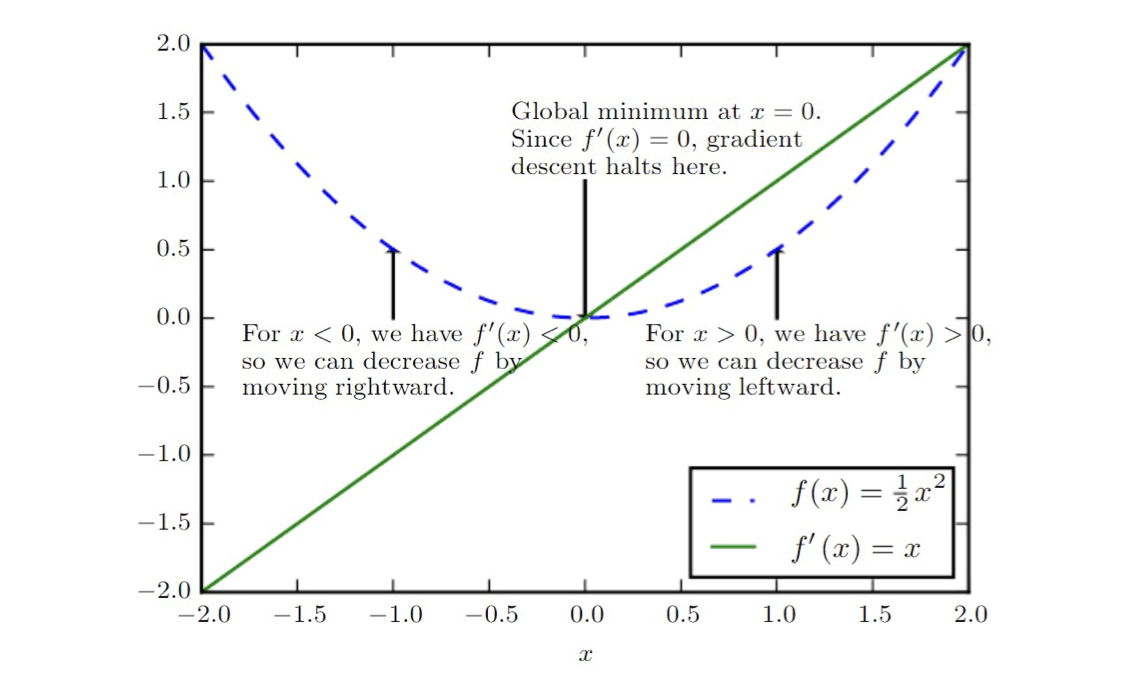

## Batch gradient descent

- **batch refers the whole dataset**

we start with $\beta_0$ and update based on

$$
\beta_k=\beta_{k-1}-\eta\frac{1}{N}\sum_{i=1}^{N}\nabla f_i(\beta_{k-1})
$$

$\beta_0$ is an initial guess of optimal point,

$\beta_{k-1}$ is the $k-1$ th guess of optimal point,

$\beta_{k}$ is the next guess of $\beta_{k-1}$,

gradient vector $\nabla f(\beta_{k-1}) \in \mathbb{R}^{p}$ is the gradient of function $f$ at point $\beta_{k-1}$, 

the value of $f$ decreases fastest along the direction of gradient, change rate is largest

$$
[\nabla f(\beta_k)]_j = \frac{\partial f(\beta_k)}{\partial [\beta_k]_j}
$$

$\eta$ is step size, a small scalar, can use constant or different step size for each iteration

## Mini-batch gradient descent

- mini-batch refers a subset of whole dataset, size $m = 2^N$

$$
\beta_k=\beta_{k-1}-\eta\frac{1}{m}\sum_{i=1}^{m}\nabla f_i(\beta_{k-1})
$$

## Stocastic gradient descent (SGD)

- SGD also called online learning, stocastic refers to randomly select **one sample**

$$
\beta_k=\beta_{k-1}-\eta\nabla f_{J_k}(\beta_{k-1})
$$

For the kth iteration, **randomly pick a sample** $J_k$ from data set

$J_k\in[n]$ is a uniform random variable

denote random vector $g_\beta = \nabla f_{J_k}(\beta_{k-1})$

$g_\beta$ is the gradient of function $f$ at point $\beta_{k-1}$ of **example $J$**

assume we have random access to $g_\beta$:

$$
\mathbb{E}(g_\beta)=\nabla f(\beta)
$$

# 2nd order gradient descent

## curvature, second derivative, Hessian

- **curvature/concavity** is a geometric property describing shape (change rate of direction) of a function at a certain point

    - a flat region: low curvature

    - a sharp region: high curvature

- **second derivative** (change rate of first derivative) and Hessian matrix are math concepts that quantify the curvature in one-dimensional and multidimensional functions, respectively.

- **sign** of second derivative determine if a critical point is local minima

    - local minima: second derivative is positive in all direction

    - local maxima: second derivative is negative in all direction

    - saddle point: second derivative = 0 in one direction


- **conditional number of Hessian matrix** measures how much the second partial derivatives differ from each other by ratio of largest eigenvalue to smallest eigenvalue

    - gradient descent is bad when high conditional number
    
        bc first-order derivative decrease rapidly in one direction while decrease slowly in another direction

        step size must be small enough to avoid overshooting.

    - solution: use Hessian matrix in gradient descent.

- **sign** of eigenvalues of Hessian matrix determine if a critical point is local minima

    - local minima: all positive

    - local maxima: all negative

    - saddle point: mixed

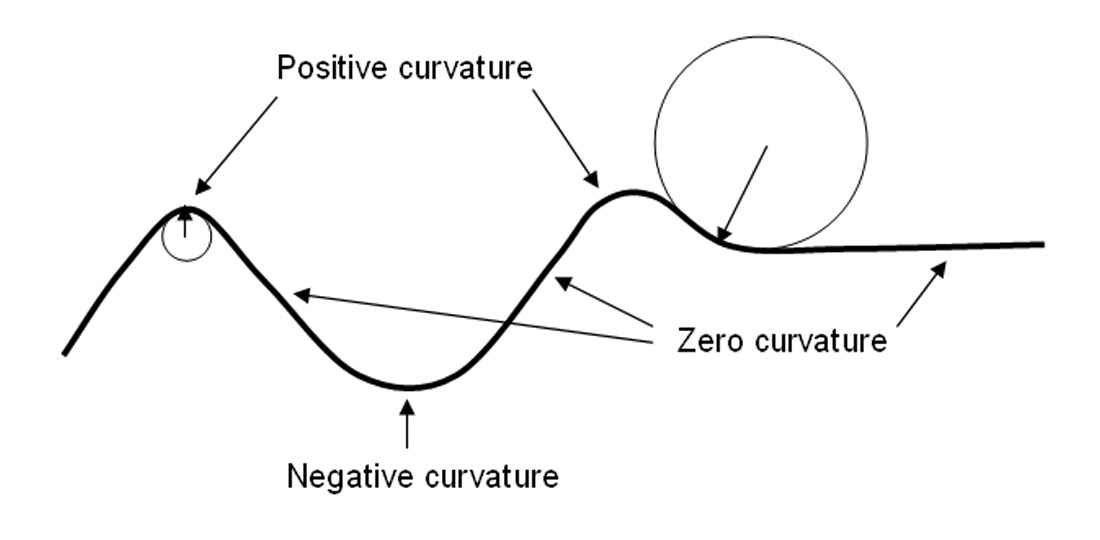

## Taylor theorem

goal: find minimum of loss function $f$

approximate loss function $f$ at point $\beta$ by **second-order** Taylor expansions:

$$
f(\beta)\approx f(\beta_0)+\Delta \beta^T\nabla f(\beta)+\frac{1}{2}\Delta \beta^TH\Delta \beta
$$

set first-order Taylor expansion on $\nabla f(\beta)$ to 0

$$
\nabla f(\beta)\approx\nabla f(\beta_0)+H(f(\beta_0))(\beta-\beta_0) = 0
$$

then we solve for update 

$$
\beta-\beta_0 = -H(f(\beta_0))^{-1}\nabla f(\beta_0)
$$

thus change of $f$ is **always negative**, loss will decrease until reach minima

$$
\Delta f = f(\beta)-f(\beta_0)=-\frac{1}{2}\nabla f(\beta_0) H(f(\beta_0))^{-1} \nabla f(\beta_0)< 0
$$

## Newton's 

we start with $\beta_0 = 0$ and update based on

$$
\beta_{k} = \beta_k - \frac{1}{n}\sum_{i=1}^{n}[H (f_i(\beta_{k-1}))]^{-1} \nabla f_i(\beta_{k-1})
$$

- Hessian matrix $H(f(\beta)) \in \mathbb{R}^{p \times p}$ is a square matrix containing all the second-order partial derivatives of loss function of w.r.t $\beta$

$$
[H (f(\beta_k))]_{ij} = \frac{\partial^2 f(\beta_k)}{\partial_{{[\beta_k]}_i} \partial_{{[\beta_k]}_j}}
$$

- adaptive step size: no explicit $\eta$, Newton's method automatically adapts the step in each dimension according to the change rate of gradient.

- prons: faster convergence then fist-order GD

- cons: 

   - high time complexity $O(p^3)$ to solve inverse of Hassian, impractical for big data

   - can stuck in saddle points bc explicitly find a critical point where gradient is 0

## Regularized Newton's method

adds a regularization term $\lambda I$ to the Hessian matrix to improve its conditioning or to ensure it is positive definite. 

The update rule for the regularized Newton's method is:

\begin{equation}
\boldsymbol{\beta}_{k+1} = \boldsymbol{\beta}_k - (H f(\boldsymbol{\beta}_k) + \lambda I)^{-1} \nabla f(\boldsymbol{\beta}_k)
\end{equation}

$\lambda$ is regularization level and $I$ is identity matrix

## quasi-Newton method: BFGS

The BFGS algorithm is a quasi-Newton method that **approximates the Hessian matrix** with a matrix $\boldsymbol{H}_{k+1}^{-1}$ using low-rank updates based on gradient information. 

The BFGS update rule is as follows:

\begin{equation}
\boldsymbol{\beta}_{k+1} = \boldsymbol{\beta}_k - \boldsymbol{H}_{k+1}^{-1} \nabla f(\boldsymbol{\beta}_k)
\end{equation}

\begin{equation}
\boldsymbol{H}_{k+1} = \boldsymbol{H}_k + \frac{\boldsymbol{y}_k \boldsymbol{y}_k^T}{\boldsymbol{y}_k^T \boldsymbol{s}_k} - \frac{\boldsymbol{H}_k \boldsymbol{s}_k \boldsymbol{s}_k^T \boldsymbol{H}_k}{\boldsymbol{s}_k^T \boldsymbol{H}_k \boldsymbol{s}_k}
\end{equation}

where $\boldsymbol{s}_k = \boldsymbol{\beta}_{k+1}-\boldsymbol{\beta}_{k}$ and $\boldsymbol{y}_k = \nabla f(\boldsymbol{\beta}_{k+1})-\nabla f(\boldsymbol{\beta}_k)$

## conjugate gradient

Conjugate direction methods can be regarded as between
steepest descent (first-order method that uses
gradient) and Newton’s method (second-order method that uses
Hessian as well).

1. Choose an initial guess $\boldsymbol{w}_0$.

2. Set the initial residual $\boldsymbol{r}_0 = \boldsymbol{b} - A\boldsymbol{w}_0$ and search direction $\boldsymbol{p}_0 = \boldsymbol{r}_0$.

3. For $k = 0, 1, 2, \dots$ until convergence:

    a. Calculate the step size: $\alpha_k = \frac{\boldsymbol{r}_k^T \boldsymbol{r}_k}{\boldsymbol{p}_k^T A\boldsymbol{p}_k}$.

    b. Update the solution: $\boldsymbol{w}_{k+1} = \boldsymbol{w}_k + \alpha_k \boldsymbol{p}_k$.

    c. Update the residual: $\boldsymbol{r}_{k+1} = \boldsymbol{r}_k - \alpha_k A\boldsymbol{p}_k$.

    d. Check for convergence: If $|\boldsymbol{r}_{k+1}|$ is small enough, stop the iteration.

    e. Update the search direction: 

$$\beta_k = \frac{\boldsymbol{r}_{k+1}^T \boldsymbol{r}_{k+1}}{\boldsymbol{r}k^T \boldsymbol{r}k}
$$ 

$$
\boldsymbol{p}_{k+1} = \boldsymbol{r}_{k+1} + \beta_k \boldsymbol{p}_k
$$

# momentum methods

gradient is moving average of gradients

2 modifications to standard gradient descent

- change velocity $v$ rather than position

- use a friction term $\mu$ to gradually reduce velocity

## standard Momentum



a. Update velocity: $\boldsymbol{v}_{k+1} = \mu \boldsymbol{v}_k - \eta \nabla f(\boldsymbol{w}_k)$.

b. Update position: $\boldsymbol{w}_{k+1} = \boldsymbol{w}_k + \boldsymbol{v}_{k+1}$.

Here, $\boldsymbol{v}_k$ is the velocity at iteration $k$, 

friction $0<\mu<1$ is the **momentum coefficient**, Typical values include 0.5, 0.9, and 0.99

$\mu=0$ is standard GD: lots of friction and velocity can't build up 

$\mu=1$ no friction

if gradient is always same, terminal velocity is $\frac{\eta||\nabla C||}{1-\mu}$, use this formula to caculate proper momentum coefficient

$\eta$ is the learning rate,  

$\nabla f(\boldsymbol{w}_k)$ is the gradient of the objective function at $\boldsymbol{w}_k$.



## Nesterov Momentum

Nesterov Momentum (Nesterov Accelerated Gradient):

a. Calculate intermediate position: $\tilde{\boldsymbol{w}}_k = \boldsymbol{w}_k + \mu v_k$.

b. Update velocity: $v_{k+1} = \mu v_k - \eta \nabla f(\tilde{\boldsymbol{w}}_k)$.

c. Update position: $\boldsymbol{w}_{k+1} = \boldsymbol{w}_k + v_{k+1}$.

The main difference from vanilla momentum is the calculation of the intermediate position $\tilde{\boldsymbol{w}}_k$ and using the gradient at this intermediate position in the velocity update. 

advantage: **if momentum term overshoot, gradient can go back** and correct it in same update step

Pros of Nesterov Momentum:
1. Faster convergence: than standard momentum due to its ability to anticipate the gradient direction.

2. Reduced oscillations: smoother updates and better convergence.

Cons of Nesterov Momentum:

1. Complexity: Nesterov Momentum requires additional computations, which might increase complexity in the implementation.

2. hyperparameter tuning: learning rate and momentum coefficient.


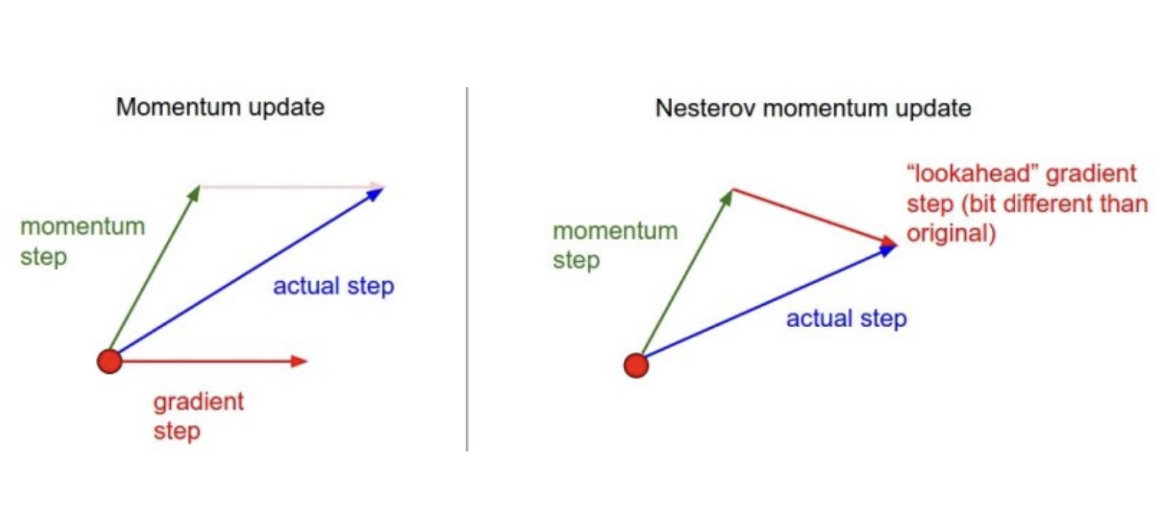

# Adaptive learning rate

- loss function is highly sensitive to some directions in parameter space while insensitive to other directions, so we need separate learning rate for each parameter

## AdaGrad

- divide learning rate by **whole historical** gradients 

    thus learning rate of parameters with large gradient will decrease a lot 

    learning will towards gently sloped directions

- disadvantage: 

    - too large accumulated gradients will lead to too small learning rate, can't arrive at minima

    - only for convex loss

Algorithm:

a. Accumulate squared gradients: $g_{k+1} = g_k + \nabla f(\boldsymbol{w}_k) \odot \nabla f(\boldsymbol{w}_k)$.

b. Update position: $\boldsymbol{w}_{k+1} = \boldsymbol{w}_k - \frac{\eta}{\sqrt{g_{k+1} + \epsilon}} \odot \nabla f(\boldsymbol{w}_k)$.

$g_k$ is the sum of **historical** squared gradients up to iteration $k$, 

$\eta$ is global learning rate, 

$\epsilon$ is a small constant $10^{-7}$ to prevent division by zero,  

$\nabla f(\boldsymbol{w}_k)$ is the gradient of the objective function at $\boldsymbol{w}_k$.

## RMSProp

- solve AdaGrad issue by discard too old history

- can be used for both convex and non-convex loss

Algorithm:

a. Update exponentially weighted moving average gradient: $g_{k+1} = \rho g_k + (1-\rho)\nabla f(\boldsymbol{w}_k) \odot \nabla f(\boldsymbol{w}_k)$.

b. Update position: $\boldsymbol{w}_{k+1} = \boldsymbol{w}_k - \frac{\eta}{\sqrt{g_{k+1} + \epsilon}} \odot \nabla f(\boldsymbol{w}_k)$.

$\rho$ is the decay rate of the moving average

 other variables have the same meanings as in AdaGrad.

## Adam (**Ada**ptive gradeint descent with **m**omentum)

- combine adaptive learning rate RMSProp and momentum

- use first and second moments

Algorithm:

a. Update biased first moment estimate: $m_{k+1} = \beta_1 m_k + (1-\beta_1) \nabla f(\boldsymbol{w}_k)$.

b. Update biased second moment estimate: $v_{k+1} = \beta_2 v_k + (1-\beta_2) (\nabla f(\boldsymbol{w}_k))^2$.

c. Correct bias in first moment estimate: $\hat{m}_{k+1} = \frac{m_{k+1}}{1 - \beta_1^{k+1}}$.

d. Correct bias in second moment estimate: $\hat{v}_{k+1} = \frac{v_{k+1}}{1 - \beta_2^{k+1}}$.

e. Update position: $\boldsymbol{w}_{k+1} = \boldsymbol{w}_k - \frac{\eta}{\sqrt{\hat{v}_{k+1}} + \epsilon} \hat{m}_{k+1}$.

In Adam, $\beta_1$ and $\beta_2$ are the **exponential decay rates** for the first and second moment estimates, respectively. 

The other variables have the same meanings as in AdaGrad and RMSProp.

# implementation

In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt 


def gradientDescent(type: str):
    """Implementation of 3 types of gradient descent (Batch, Newton's, stochastic)
       Plot 4 subplots: 
       1. Optimization error vs. runtime, 
       2. Optimization error vs. iteration times
       3. Statistical error vs. runtime,
       4. Statistical error vs. iteration times

       type: 'linear' or 'logistic'
    """
    n=1000 # sample size

    p=10 # number of feature

    # Singular Value Decomposition of p*p matrix
    u,s,v = np.linalg.svd(np.random.randn(p,p))

    # input n*p matrix
    X = np.random.randn(n,p) @ (u*(2./np.sqrt(np.arange(1,p+1)))) @ u.T

    # true beta p*1 vector
    betastar = np.random.randn(p)

    # response
    if type == 'linear':
        y = X @ betastar + np.random.randn(n)
    elif type == 'logistic':
        y = np.random.rand(n) < 1/(1 + np.exp(- X @ betastar))

    # hyperparameters
    eta = 0.1       # step size
    epoch = 100     # number of iterations

    # store guesses of beta
    B_batch = np.zeros((epoch,p))
    B_newton = np.zeros((epoch,p))
    B_SGD = np.zeros((epoch, p))

    # store time count
    t_batch = np.zeros(epoch)
    t_newton = np.zeros(epoch)
    t_SGD = np.zeros(epoch)
    times = [t_batch, t_newton, t_SGD]


    # batch gradient descent
    start = time.time()
    for k in range(1,epoch):
        B_batch[k] = B_batch[k-1] - eta/n * X.T @ (X @ B_batch[k-1] - y)
        t_batch[k-1] = time.time()-start 

    # Newton's gradient descent
    start = time.time()
    for k in range(1, epoch):
        B_newton[k] = B_newton[k-1] - eta/n * np.linalg.inv(X.T @ X / n) @ X.T @ (X @ B_newton[k-1] - y)
        t_batch[k-1] = time.time()-start 

    # stochastic gradient descent
    start = time.time()
    for k in range(1, epoch):
        J = np.random.randint(0, n)     # randomly pick an integer J from [0, n)
        B_SGD[k] = B_SGD[k-1] - eta/np.sqrt(k) * X[J] * (X[J] @ B_SGD[k-1] - y[J])
        t_SGD[k-1] = time.time()-start 


    # Log optimization error: $\hat{beta}$ is the last update 
    optim_errors = [np.log(np.sum((beta[:-1] - beta[-1])**2, axis=1)) for beta in [B_batch, B_newton, B_SGD]]

    # Log statistical error
    stat_errors = [np.log(np.sum((beta[:-1] - betastar)**2, axis=1)) for beta in [B_batch, B_newton, B_SGD]]

    labels = ['Batch', "Newton", 'SGD']
    ylabels = [r"Log optimization error $\left\| \beta_k - \hat{\beta}\right\|$", 
                r"Log statistical error $\left\| \beta_k - \beta^*\right\|$"]

    errors = [optim_errors, stat_errors]

    fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))


    for i in range(2):
        for j in range(3):
            axs[i][0].plot(times[j][:-1], errors[i][j], label=labels[j])
            axs[i][1].plot(errors[i][j], label=labels[j])
        axs[i][0].set_ylabel(ylabels[i])

    axs[1][0].set_xlabel("Runtime (s)")
    axs[1][1].set_xlabel("Iteration times")

    def uniquelabels(figure):

        lines_labels = [ax.get_legend_handles_labels() for ax in figure.axes]
        lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]

        # grab unique labels
        unique_labels = set(labels)

        # assign labels and legends in dict
        legend_dict = dict(zip(labels, lines))

        # query dict based on unique labels
        unique_lines = [legend_dict[x] for x in unique_labels]

        return unique_lines, unique_labels

    fig.legend(*uniquelabels(fig), bbox_to_anchor=(1.1, 0.6))

    fig.suptitle(f"Gradient descent of {type} regression model", fontsize=15, x=0.5, y=0.95)


# linear regression

input matrix $X \in \mathbb{R}^{n \times p}$ , $n$ observations, $p$ features, with $i^{th}$ row $\mathbf{x}_i^T\in \mathbb{R}^{1\times p}$

$X_{(i,j)}$ or $[\mathbf{x}_i^T]_{(j)}$ is an observation in $i^{th}$ row and $j^{th}$ column

weight vector $\beta \in \mathbb{R}^p$ with $i^{th}$ entry $\beta_i$

response vector $\mathbf{y} \in \mathbb{R}^n$ with $i^{th}$ entry $\mathbf{y_i}\in \mathbb{R}$

empirical risk function of $\beta$: 

$$
f(\beta)=\frac{1}{2n}\left \| X\beta- \mathbf{y}\right \|^{2}=\frac{1}{2n}\sum_{i=1}^n (\mathbf{x}_i^T \beta-\mathbf{y}_i)^2
$$ 

we try to minimize it to find the optimal $\beta$

$$
\hat{\beta }=\underset{\beta }{\arg \min} f(\beta)
$$


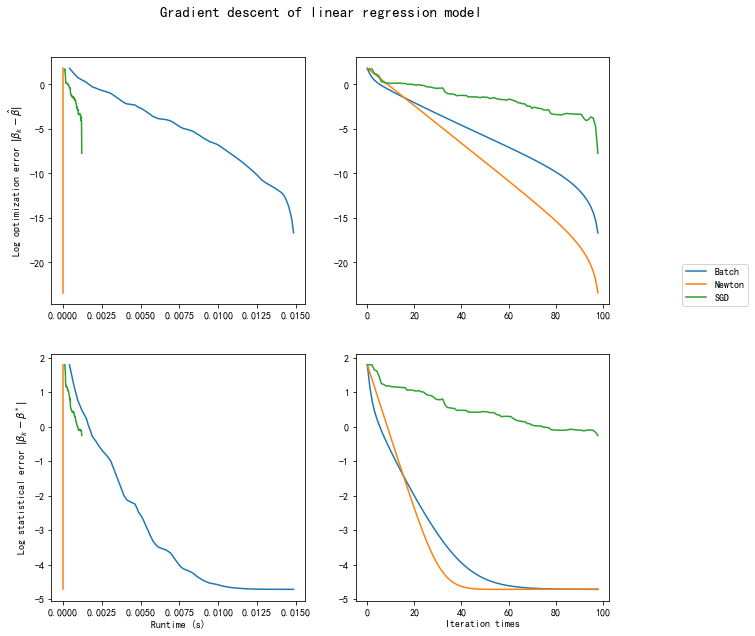

In [ ]:
gradientDescent(type='linear')

## visualize gradient descent in 2-D

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

def f(X, y, beta):
    """MSE"""
    return np.linalg.norm(X@beta - y)**2/X.shape[0]

def grad(X, y, beta):
    """Returns gradient of a linear function
    """
    return X.T @ (X @ beta - y)/X.shape[0]


def stochastic_grad(X, y, beta):
    """return a stochastic gradient (analytical)"""
    # pick a random index
    i = np.random.randint(0, X.shape[0])
    return X[i] * (X[i] @ beta - y[i])

def hess(X):
    """Returns a Hessian matrix of linear function"""
    return X.T @ X /X.shape[0]

def batch(X, y, beta0, step_size=0.001, num_iters=10):
    """Batch gradient descent
       Returns weight of last update
    """
    g0 = grad(X, y, beta0)  # initial gradient
    
    for _ in range(num_iters):    
        beta = beta0 - step_size * g0   # update weight
        plt.plot(beta[0], beta[1], 'ro')
        plt.plot([beta0[0],beta[0]],[beta0[1],beta[1]],'ro-')
        beta0 = beta   
        g0 = grad(X, y, beta0)  
            
    return beta0


def newton(X, y, beta0, step_size=0.001, num_iters=10):
    """Newton's gradient descent"""
    g0 = grad(X, y, beta0)  # initial gradient
    
    for _ in range(num_iters):    
        beta = beta0 - step_size * np.linalg.inv(hess(X)) @ g0   # update weight
        plt.plot(beta[0], beta[1], 'bo')
        plt.plot([beta0[0],beta[0]],[beta0[1],beta[1]],'bo-')
        beta0 = beta   
        g0 = grad(X, y, beta0)  
            
    return beta0


def sgd(X, y, beta0, step_size=0.001, num_iters=10):
    """stocastic gradient descent"""
    g0 = stochastic_grad(X, y, beta0)  # initial gradient
    
    for _ in range(num_iters):    
        beta = beta0 - step_size * g0   # update weight
        plt.plot(beta[0], beta[1], 'go')
        plt.plot([beta0[0],beta[0]],[beta0[1],beta[1]],'go-')
        beta0 = beta   
        g0 = stochastic_grad(X, y, beta0)  
            
    return beta0

Text(0, 0.5, '$X_2$')

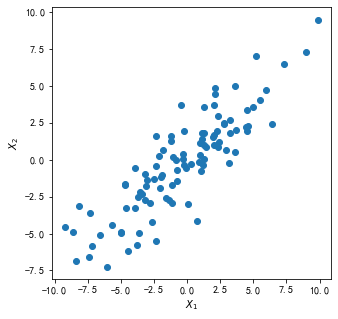

In [ ]:
### data
n=100
p=2 # 2 features
u=np.array([[1,1],[1,-1]])

X = np.random.randn(n,p)*np.array([4,1])@u 
betastar = np.random.randn(2)
y = X@betastar + 0.1*np.random.randn(n)

# 2 features are highly correlated
plt.figure(figsize=[5,5])
plt.scatter(X[:,0], X[:,1])
plt.xlabel(r"$X_1$")
plt.ylabel(r"$X_2$")

# betahat = np.linalg.inv(X.T @ X) @ X.T @ y

# gradient of betahat should be zero
# grad(X, y, betahat), stochastic_grad(X, y, betahat)

loss decreases fastest in the direction that is vertical to level curve

Text(0.6, 0.6, 'End (-0.385, 1.883)')

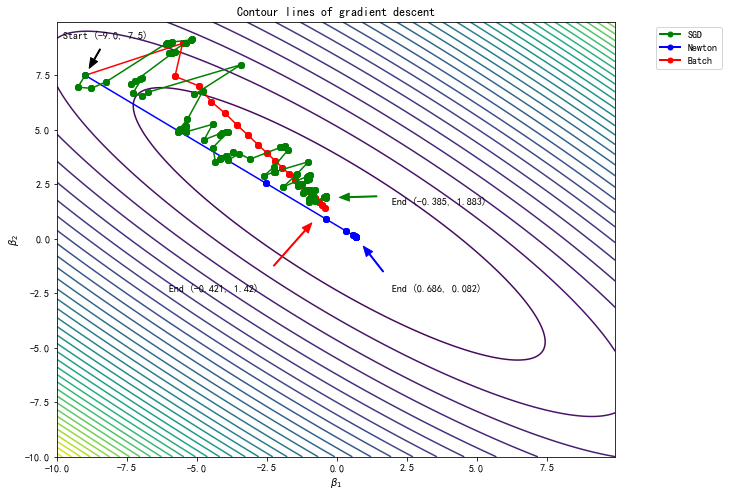

In [ ]:
fig, ax = plt.subplots(figsize=[10,8])

x = np.arange(-10,10,0.05)  # shape (400,)
# 等高线，值为MSE The height values  (400, 400)
z = np.array([f(X, y, np.array([a,b])) for a in x for b in x]).reshape((x.shape[0],x.shape[0]))
plt.contour(x, x, z, levels=50)

# initial weight
beta0 = np.array([-9,7.5])
beta_batch = batch(X, y, beta0, step_size=1.6/30,num_iters=20)
beta_newton = newton(X, y, beta0, step_size=20/30,num_iters=20)
beta_sgd = sgd(X, y, beta0, step_size=0.01,num_iters=100)

legend_elements = [Line2D([0], [0], marker='o', color='g', lw=2, 
                     markerfacecolor='g', markersize=5,label='SGD'),

                   Line2D([0], [0], marker='o', color='b', lw=2,
                          markerfacecolor='b', markersize=5, label='Newton'),

                   Line2D([0], [0], marker='o', color='r', lw=2,
                          markerfacecolor='r', markersize=5, label='Batch')]
plt.legend(handles=legend_elements, bbox_to_anchor=(1.2, 1))

plt.xlabel(r"$\beta_1$")
plt.ylabel(r"$\beta_2$")
plt.title("Contour lines of gradient descent")

ax.annotate(text=f'Start {tuple(beta0)}', xy=beta0, xycoords='data',
            xytext=(0.01, 0.98), textcoords='axes fraction',
            va='top', ha='left',
            arrowprops=dict(width=1, headlength=10, headwidth=8, color='black',  shrink=0.2))


ax.annotate(text=f'End {tuple(np.round(beta_newton, 3))}', xy=beta_newton, xycoords='data',
            xytext=(0.6, 0.4), textcoords='axes fraction',
            va='top', ha='left',
            arrowprops=dict(width=1, headlength=10, headwidth=8, color='blue',  shrink=0.2))

ax.annotate(text=f'End {tuple(np.round(beta_batch, 3))}', xy=beta_batch, xycoords='data',
            xytext=(0.2, 0.4), textcoords='axes fraction',
            va='top', ha='left',
            arrowprops=dict(width=1, headlength=10, headwidth=8, color='red', shrink=0.2))

ax.annotate(text=f'End {tuple(np.round(beta_sgd, 3))}', xy=beta_sgd, xycoords='data',
            xytext=(0.6, 0.6), textcoords='axes fraction',
            va='top', ha='left',
            arrowprops=dict(width=1, headlength=10, headwidth=8, color='green', shrink=0.2))


## batch gradient descent

- gradient:

$$
\nabla f\left ( \beta  \right )=\frac{1}{n}X^{T}\left ( X\beta -\mathbf{y} \right )=\frac{1}{n}\sum_{i=1}^n [\mathbf{\mathbf{x_i}}(\mathbf{\mathbf{x_i}}^T\beta-\mathbf{y}_i)]
$$

- the $j^{th}$ entry of gradient:

$$
\frac{1}{n}\sum_{i=1}^n [\mathbf{x}_i]_j (\mathbf{x}_i^T\beta -\mathbf{y}_i)
$$

- weight update:

$$
\begin{align}
\beta_k
&=\beta_{k-1}-\eta\nabla f(\beta_{k-1})\\[1em]

&=\beta_{k-1}-\eta \frac{1}{n}X^{T}\left ( X\beta_{k-1} -\mathbf{y} \right )\\[1em]

&=\beta_{k-1}-\eta \frac{1}{n}\sum_{i=1}^n \mathbf{\mathbf{x_i}}(\mathbf{\mathbf{x_i}}^T\beta_{k-1}-\mathbf{y}_i)\\[1em]
\end{align}
$$

## Newton's

- gradient:

$$
\nabla f\left ( \beta  \right )=\frac{1}{n}X^{T}\left ( X\beta -\mathbf{y} \right )=\frac{1}{n}\sum_{i=1}^n \mathbf{\mathbf{x_i}}(\mathbf{\mathbf{x_i}}^T\beta-\mathbf{y}_i)
$$

- Hessian: a square matrix $\in \mathbb{R}^{p \times p}$

$$
H(f(\beta))=\frac{1}{n}X^TX=\frac{1}{n}\sum_{i=1}^n\mathbf{x}_i\mathbf{x}_i^T
$$

- the ${i,j}^{th}$ entry of Hessian:

$$
\left[H(f(\beta))\right]_{ij}=\frac{1}{n}\sum_{k=1}^n[\mathbf{x}_k]_{i}[\mathbf{x}_k]_{j}
$$

- weight update:

$$
\begin{align}
\beta_{k} 
&= \beta_{k-1} - [H (f(\beta_k))]^{-1} \nabla f(\beta_{k-1})\\[1em]

&=\beta_{k-1}-\left(\frac{1}{n}X^TX \right)^{-1} \left[\frac{1}{n}X^{T}( X\beta_{k-1} -\mathbf{y} ) \right]\\[1em]

&=\beta_{k-1}-[\beta_{k-1}-(X^TX)^{-1}X^T\mathbf{y}]\\[1em]

&=(X^TX)^{-1}X^T\mathbf{y}\\[1em]
\end{align}
$$

Newton's method for **quadratic function $f$ solving in 1 step**

$\beta_{k}=(X^TX)^{-1}X^Ty$ means Newton's for linear regression can find solution by **only 1 iteration**

## SGD

- gradient for sample $J$:

$$
\nabla f_{J}(\beta)=\mathbf{x}_{J}(\mathbf{x}_{J}^T\beta-\mathbf{y}_{J})
$$

- weight update:

$$
\begin{align}
\beta_k
&=\beta_{k-1}-\eta\nabla f_{J_k}(\beta_{k-1})\\[1em]
&=\beta_{k-1}-\eta\mathbf{x}_{J_k}(\mathbf{x}_{J_k}^T\beta_{k-1}-\mathbf{y}_J)
\end{align}
$$


# Logistic regression

input matrix $X \in \mathbb{R}^{n \times m}$ , $n$ observations, $m$ features, with $i^{th}$ row $\mathbf{x}_i^T\in \mathbb{R}^{1\times m}$

$X_{(i,j)}$ or $[\mathbf{x}_i^T]_{(j)}$ is an observation in $i^{th}$ row and $j^{th}$ column

weight vector $\beta \in \mathbb{R}^m$ with $i^{th}$ entry $\beta_i$

response vector label $\mathbf{y} \in  \mathbb{R}^n$ with $i^{th}$ entry $\mathbf{y_i}\in \left\{0,1\right\}$

empirical risk function of $\beta$: 

$$
f(\beta)=\frac{1}{n} \sum_{i=1}^n  \ln [1+\textrm{exp}(\beta^T \mathbf{x_i})]-\mathbf{y_i} \beta^T \mathbf{x_i}
$$ 

we try to minimize it to find the optimal $\beta$

$$
\hat{\beta }=\underset{\beta}{\arg \min}f\left ( \beta  \right )
$$


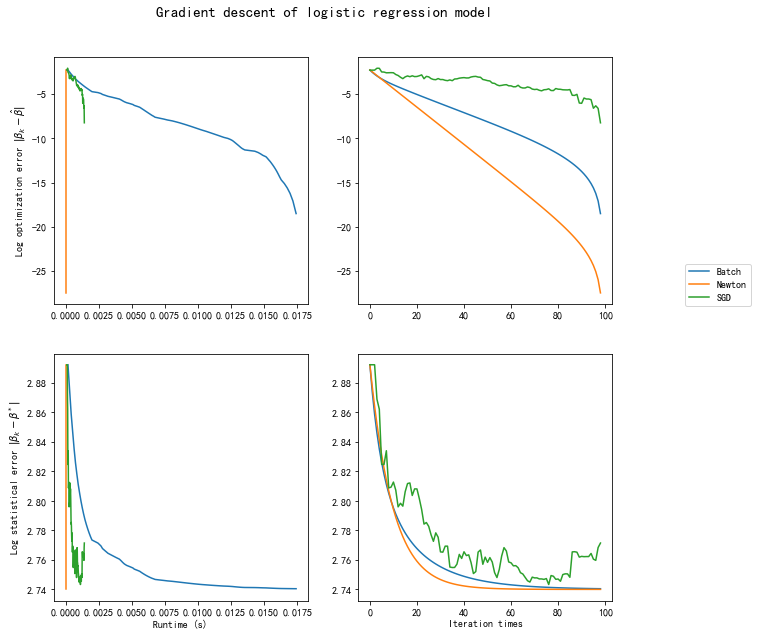

In [ ]:
gradientDescent('logistic')

## batch gradient descent

- gradient:

$$
\nabla f\left ( \beta  \right )=\frac{1}{n}X^{T}\left ( \mathbf{p} -\mathbf{y} \right )=\frac{1}{n}\sum_{i=1}^n \mathbf{\mathbf{x_i}}(\mathbf{p_i}-\mathbf{y_i})
$$

**Note, compared with linear regression, just change $x^T\beta$ to $p$**

the $i^{th}$ entry of gradient:

$$
\sum_{k=1}^n [\mathbf{x_k}]_i (\mathbf{p}_k -\mathbf{y}_k)
$$

- weight update:

$$
\begin{align}
\beta_k
&=\beta_{k-1}-\eta\nabla f(\beta_{k-1})\\[1em]

&=\beta_{k-1}-\eta \frac{1}{n} X^T( \mathbf{p} -\mathbf{y})\\[1em]

&=\beta_{k-1}-\eta\frac{1}{n}\sum_{i=1}^n \mathbf{\mathbf{x_i}}(\mathbf{p_i}-\mathbf{y_i})\\[1em]
\end{align}
$$

- conditional probability $\mathbf{p} \in \mathbb{R}^n$ is a vector, where the $i$ th entry $\mathbf{p_i} \in  (0, 1)$ is an output of sigmoid function

$$
\mathbf{p_i}=P(\mathbf{y_i}=1 | \mathbf{x_i}) = \frac{\textrm{exp}(\mathbf{x_i}^T \beta)}{1+\textrm{exp}(\mathbf{x_i}^T \beta)}=\frac{1}{1+\textrm{exp}(-\mathbf{x_i}^T \beta)}
$$

derivative of $\mathbf{p_i}$ with respect to $\beta$ is:

$$
\frac{\partial \mathbf{p_i}}{\partial \beta}=\mathbf{p_i}(1-\mathbf{p_i})\mathbf{x_i}
$$

partial derivative of $\mathbf{p_i}$ with respect to $j$ th entry of $\beta$ is:

$$
\frac{\partial \mathbf{p_i}}{\partial [\beta]_j}=\mathbf{p_i}(1-\mathbf{p_i})\left [ \mathbf{x_i} \right ]_j
$$

## Newton's

- gradient:

$$
\nabla f\left ( \beta  \right )=\frac{1}{n}X^{T}\left ( \mathbf{p} -\mathbf{y} \right )=\frac{1}{n}\sum_{i=1}^n \mathbf{\mathbf{x_i}}(\mathbf{p_i}-\mathbf{y_i})
$$

- Hessian: a square matrix $\in \mathbb{R}^{m \times m}$

$$
H(f(\beta))=\frac{1}{n}X^TSX=\frac{1}{n}\sum_{i=1}^n (\mathbf{x_i}\mathbf{x_i}^T)\mathbf{p_i}(1-\mathbf{p_i})
$$

$S \in \mathbb{R}^{n \times n}$ is a diagonal matrix, where the $(i,i)$ th diagonal element is $\mathbf{p_i}(1-\mathbf{p_i})$

$$
S= \text{diag}\left[\mathbf{p_i}(1-\mathbf{p_i})\right]
$$

the ${i,j}^{th}$ entry of Hessian:

$$
\left[H(f(\beta))\right]_{ij}=\frac{1}{n}\sum_{k=1}^n [\mathbf{x_k}]_i p_k(1-p_k) [\mathbf{x_k}]_j
$$

- weight update:

$$
\begin{align}
\beta_{k} 

&= \beta_{k-1} - [H (f(\beta_{k-1}))]^{-1} \nabla f(\beta_{k-1})\\[1em]

&=\beta_{k-1}-(X^TSX)^{-1}X^{T}\left ( \mathbf{p} -\mathbf{y} \right )\\[1em]
\end{align}
$$


## SGD

- gradient for sample $J_k$:

$$
\nabla f_{J_k}(\beta_{k-1})=\mathbf{x}_{J_k}\left(\mathbf{p}_{J_k}-\mathbf{y}_{J_k}\right)
$$

- weight update:

$$
\begin{align}
\beta_k
&=\beta_{k-1}-\eta\nabla f_{J_k}(\beta_{k-1})\\[1em]

&=\beta_{k-1}-\eta\mathbf{x}_{J_k}\left(\mathbf{p}_{J_k}-\mathbf{y}_{J_k}\right)\\[1em]
\end{align}
$$


# generalized linear model

modeling choice $\gamma=X\beta$

empirical risk function

$$
f(\beta)=\frac{1}{n}\sum_{i=1}^nA(\left \langle \mathbf{x_i},\beta \right \rangle)-\mathbf{y_i}\left \langle \mathbf{x_i},\beta \right \rangle-\ln(h(\mathbf{y_i}))
$$

## batch gradient descent

- gradient:

$$
\begin{align}
\nabla f\left ( \beta  \right )
&=\frac{1}{n}X^{T}\left ( A'(X\beta) -\mathbf{y} \right )\\[1em]
&=\frac{1}{n}X^T \mathbf{e}\\[1em]
&=\frac{1}{n}\sum_{i=1}^n \mathbf{\mathbf{x_i}}(A'(\left \langle \mathbf{x_i},\beta \right \rangle)-\mathbf{y_i})\\[1em]
&=\frac{1}{n}\sum_{i=1}^n \mathbf{\mathbf{x_i}}(\mathbf{e_i}-\mathbf{y_i})\\[1em]
\end{align}
$$

vector $\mathbf{e} \in \mathbb{R}^n$ is error

$$
\mathbf{e}=A'(X\beta)-\mathbf{y}
$$

error of $i$ th observation is 

$$
\mathbf{e}_i=A'(\left \langle \mathbf{x_i},\beta \right \rangle)-\mathbf{y_i}
$$

- weight update:

$$
\begin{align}
\beta_k

&=\beta_{k-1}-\eta\nabla f(\beta_{k-1})\\[1em]

&=\beta_{k-1}-\eta \frac{1}{n} X^T [ A'(X\beta_{k-1}) -\mathbf{y}]\\[1em]

&=\beta_{k-1}-\eta\frac{1}{n}\sum_{i=1}^n \mathbf{\mathbf{x_i}}\left[A'(\left \langle \mathbf{x_i},\beta_{k-1} \right \rangle)-\mathbf{y_i}\right]\\[1em]
\end{align}
$$

## Newton's

- gradient:

$$
\begin{align}
\nabla f\left ( \beta  \right )
&=\frac{1}{n}X^{T}\left ( A'(X\beta) -\mathbf{y} \right )\\[1em]
&=\frac{1}{n}X^T \mathbf{e}\\[1em]
&=\frac{1}{n}\sum_{i=1}^n \mathbf{\mathbf{x_i}}(A'(\left \langle \mathbf{x_i},\beta \right \rangle)-\mathbf{y_i})\\[1em]
&=\frac{1}{n}\sum_{i=1}^n \mathbf{\mathbf{x_i}}(\mathbf{e_i}-\mathbf{y_i})\\[1em]
\end{align}
$$

- Hessian

$$
H(f(\beta))=\frac{1}{n}A''(X\beta) X^TX=\frac{1}{n}\sum_{i=1}^nA''(\left \langle \mathbf{x_i},\beta \right \rangle)\ \mathbf{x_i} \mathbf{x_i}^T
$$

- weight update:

$$
\begin{align}
\beta_{k} 

&= \beta_{k-1} - [H f(\beta_{k-1})]^{-1} \nabla f(\beta_{k-1})\\[1em]

&=\beta_{k-1}-\left[A''(X\beta) X^TX\right]^{-1} X^{T}\left ( A'(X\beta) -\mathbf{y} \right )\\[1em]
\end{align}
$$


## stochastic

- gradient for sample $J_k$:

$$
\nabla f_{J_k}(\beta_{k-1})=\mathbf{x}_{J_k} [A'\left(\left \langle \mathbf{x}_{J_k},\beta_{k-1} \right \rangle \right)-\mathbf{y}_{J_k}]
$$

- weight update:

$$
\begin{align}
\beta_k
&=\beta_{k-1}-\eta\nabla f_{J_k}(\beta_{k-1})\\[1em]

&=\beta_{k-1}-\eta\mathbf{x}_{J_k} [A'\left(\left \langle \mathbf{x}_{J_k},\beta_{k-1} \right \rangle \right)-\mathbf{y}_{J_k}]
\end{align}
$$


if $y_J=1$, $A'\left(\left \langle \mathbf{x}_{J_k},\beta_{k-1} \right \rangle \right)< 1$, next iteration $\beta_k$ will be pushed to $x_J$ direction

if $y_J=0$, $A'\left(\left \langle \mathbf{x}_{J_k},\beta_{k-1} \right \rangle \right) > 0$, next iteration $\beta_k$ will be pushed away from $x_J$ direction